# BMW Car Price Prediction

[Kaggle_Dataset](https://www.kaggle.com/code/celestioushawk/bmw-car-price-prediction/notebook)

In [33]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('bmw.csv')

In [35]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [36]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [38]:
df.shape

(10781, 9)

In [39]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [40]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

<Axes: xlabel='year', ylabel='price'>

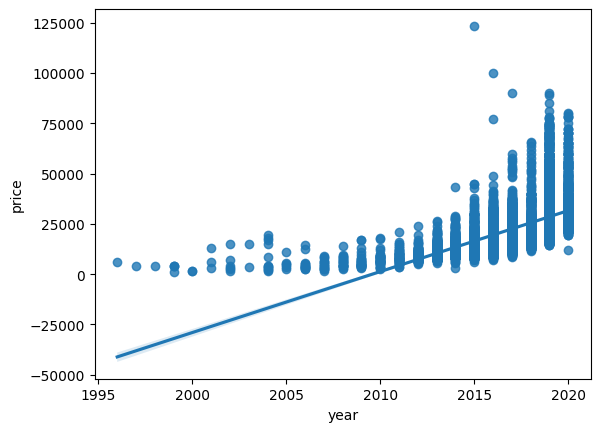

In [41]:
sns.regplot(x = 'year', y = 'price', data = df)

<Axes: xlabel='model', ylabel='price'>

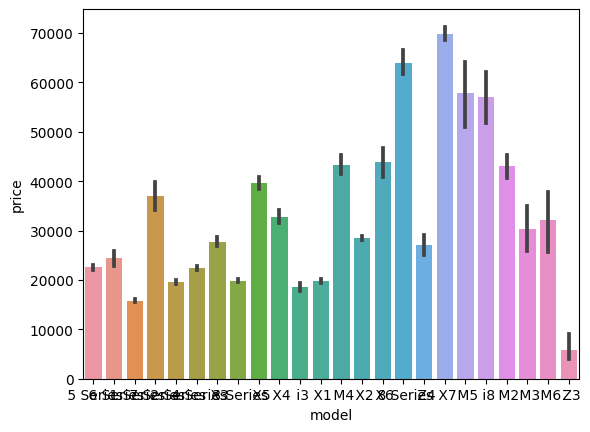

In [42]:
sns.barplot(x = 'model', y = 'price', data = df)

<Axes: xlabel='model', ylabel='price'>

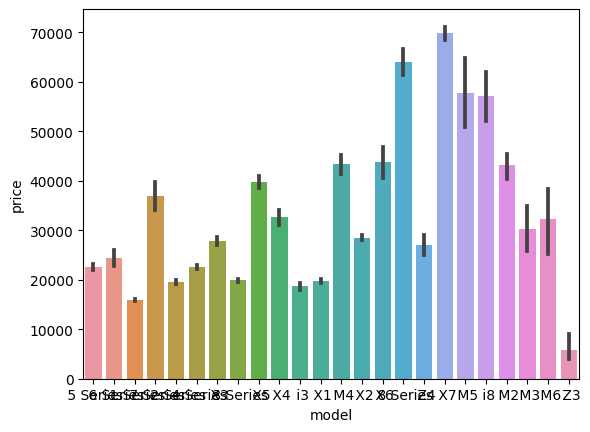

In [43]:
sns.barplot(x = 'model', y = 'price', data = df)

MODEL, TRANSMISSION, FUELTYPE is a object mostly categorical value.

We can change Transmission and FuelType to numerical value.

Changing Model to numerical value is a bit challenging , so we kind of drop it.

# Handling categorical values of Transmission column

In [44]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [46]:
df['transmission'] = df['transmission'].str.replace('Automatic','1')
df['transmission'] = df['transmission'].str.replace('Semi-Auto','2')
df['transmission'] = df['transmission'].str.replace('Manual','3')


In [48]:
df['transmission'] = df['transmission'].astype(float)

# Handling categorical values of FuelType column

In [49]:
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [50]:
df['fuelType'] = df['fuelType'].str.replace('Diesel','1')
df['fuelType'] = df['fuelType'].str.replace('Petrol','2')
df['fuelType'] = df['fuelType'].str.replace('Electric','3')
df['fuelType'] = df['fuelType'].str.replace('Hybrid','4')
df['fuelType'] = df['fuelType'].str.replace('Other','5')

In [51]:
df['fuelType'] = df['fuelType'].astype(float)

# Linear Regression on Model and price

In [52]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
y = df['price']

In [55]:
features = ['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

In [56]:
X = df[features]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)


### Model Training

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

Validation

In [67]:
y_train_pred = lr.predict(X_train)

In [68]:
y_train_pred

array([27716.40581073, 17925.42747765,  7654.28716666, ...,
       28446.0644308 ,  1634.14182331, 22509.0595798 ])

In [70]:
result = y_train - y_train_pred

<ipython-input-71-44d8422d34be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result, bins = 15)


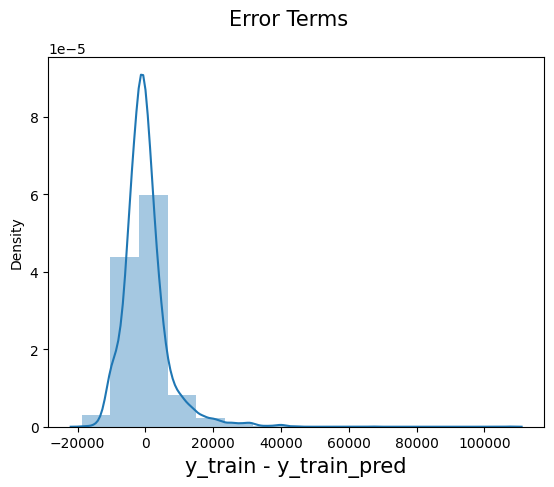

In [71]:
fig = plt.figure()
sns.distplot(result, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Evaluation

In [73]:
from sklearn import metrics

In [74]:
print('R^2:',metrics.r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.6612078001066006
Adjusted R^2: 0.6609141829963798
MAE: 4457.728045344341
MSE: 44651640.45863961
RMSE: 6682.188298651842


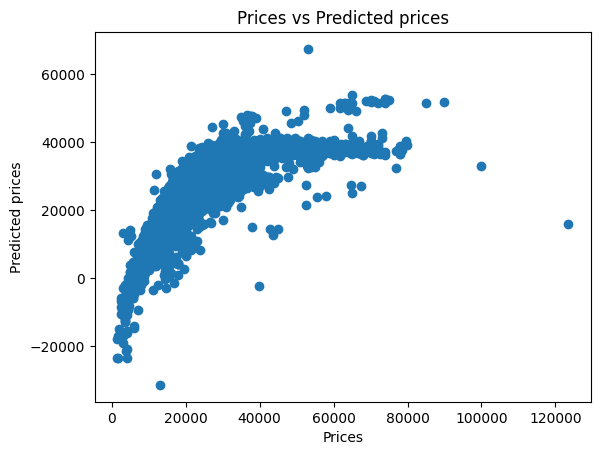

In [75]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Checking Residuals

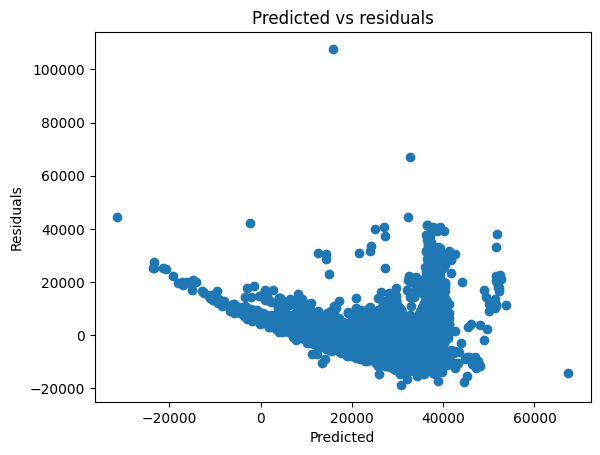

In [76]:
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Prediction on test data

In [77]:
y_test_pred = lr.predict(X_test)

In [78]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6502820839697862
Adjusted R^2: 0.6493713602301241
MAE: 4459.023895286073
MSE: 44000102.321901836
RMSE: 6633.257293509866
